<a href="https://colab.research.google.com/github/ysamia/Health-Expenses-ML-project/blob/main/Copy_of_Copy_of_Health_expenses_of_customers_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

plt.rcParams['figure.figsize'] = (26,15)
plt.style.use('classic')

In [ ]:
data = pd.read_csv('med-insurance.csv')

In [ ]:
data.shape

(1338, 7)

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

C:\Users\macha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


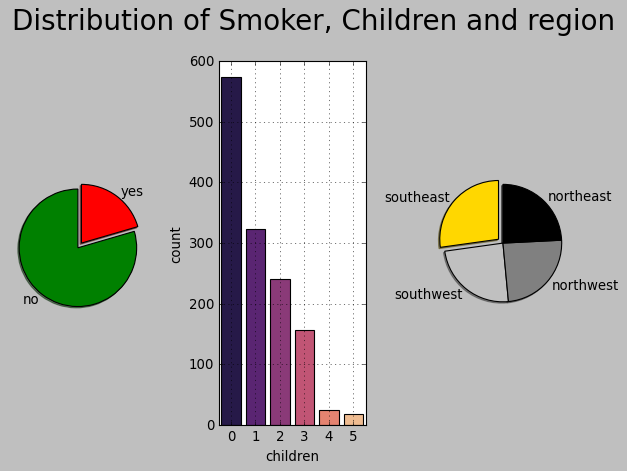

In [ ]:
#perform univariate analysis
#first we'll plot the smoker column in a pie chart as it has only two columns
plt.subplot(1, 3, 1)
plt.pie(data['smoker'].value_counts().values,
        labels = data['smoker'].value_counts().index,
        colors = ['green','red'],
        startangle = 90,
        shadow = True,
       explode = [0.1, 0])

#since the children column can take values form 0-5, we use a countplot
plt.subplot(1, 3, 2)
sns.countplot(data['children'], palette = 'magma')
plt.grid()

# the region column has only 4 options, so we use pie chart
plt.subplot(1, 3, 3)
plt.pie(data['region'].value_counts().values,
        labels = data['region'].value_counts().index,
        colors = ['gold','silver','grey','black'],
        startangle = 90,
        shadow = True,
       explode = [0.1, 0, 0, 0])

plt.suptitle('Distribution of Smoker, Children and region', fontsize = 25)
plt.tight_layout()
plt.show()

C:\Users\macha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\macha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\macha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

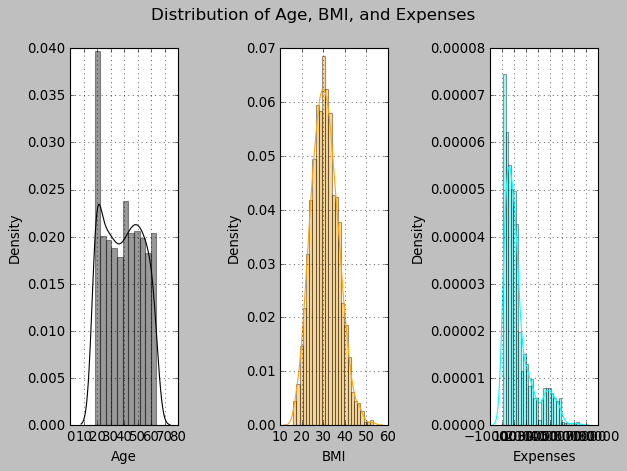

In [ ]:
# lets check the distribution of age, bmi and expenses

plt.subplot(1, 3, 1)
sns.distplot(data['age'], color = 'black')
plt.xlabel('Age')
plt.grid()

plt.subplot(1, 3, 2)
sns.distplot(data['bmi'], color = 'orange')
plt.xlabel('BMI')
plt.grid()

plt.subplot(1, 3, 3)
sns.distplot(data['expenses'], color = 'aqua')
plt.xlabel('Expenses')
plt.grid()

plt.suptitle('Distribution of Age, BMI, and Expenses', fontsize = 15)
plt.tight_layout()
plt.show()

# Here we see that the expenses column is right skewed. First we check the results keeping this as it is and if the results are poor then we can transform this column using log transformation or square root transformation

<AxesSubplot:xlabel='bmi'>

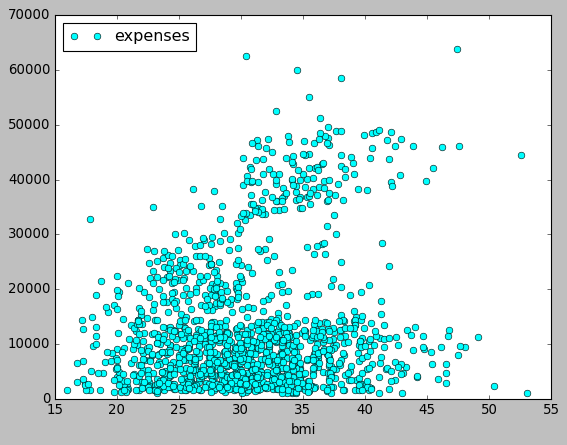

In [ ]:
# lets understand the impact of bmi on Medical Expenses
data['log_expenses'] = np.sqrt(data['expenses'])
data.plot(x='bmi', y='expenses', marker="o", color = 'cyan', ls="")

C:\Users\macha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\macha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


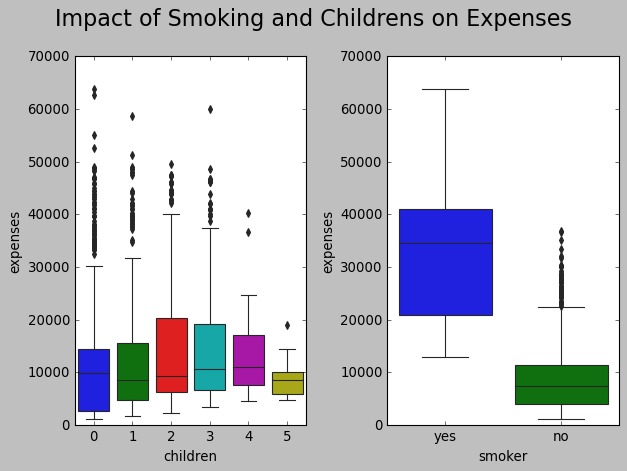

In [ ]:
plt.subplot(1, 2, 1)
sns.boxplot(data['children'], data['expenses'])

plt.subplot(1, 2, 2)
sns.boxplot(data['smoker'], data['expenses'])

plt.suptitle('Impact of Smoking and Childrens on Expenses', fontsize = 20)
plt.tight_layout()
plt.show()

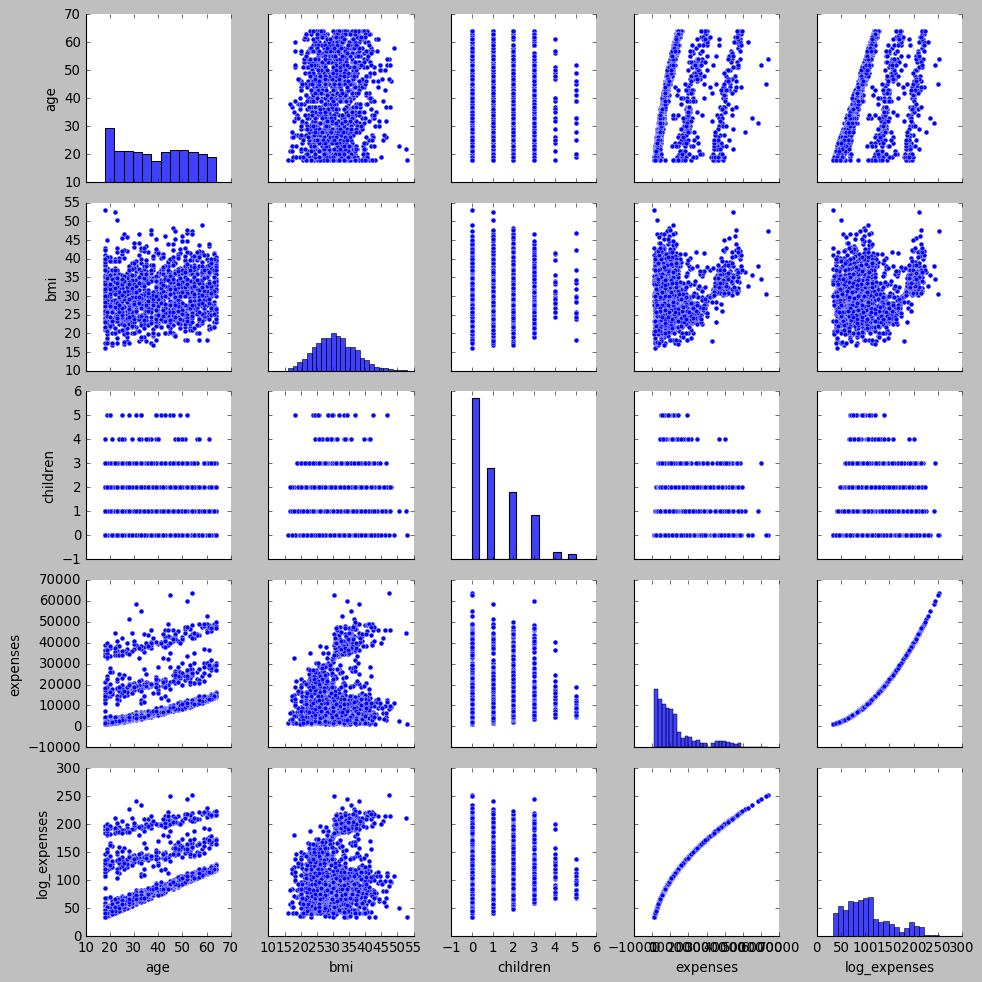

In [ ]:
sns.pairplot(data)

In [ ]:
data[['expenses', 'region']].groupby(['region']).agg(['min','mean','max']).style.background_gradient(cmap = 'Wistia')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,expenses,log_expenses
0,19,female,27.9,0,yes,southwest,16884.92,129.941987
1,18,male,33.8,1,no,southeast,1725.55,41.539740
2,28,male,33.0,3,no,southeast,4449.46,66.704273
3,33,male,22.7,0,no,northwest,21984.47,148.271609
4,32,male,28.9,0,no,northwest,3866.86,62.184082


In [ ]:
data['sex'] = data['sex'].replace(('male','female'), (2, 1))
data['smoker'] = data['smoker'].replace(('yes','no'), (2, 1))
data['region'] = data['region'].replace(('southeast','southwest','northeast','northwest'),(4, 3, 2, 1))

# let's check whether any categorical column is left
data.select_dtypes('object').columns

Index([], dtype='object')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,expenses,log_expenses
0,19,1,27.9,0,2,3,16884.92,129.941987
1,18,2,33.8,1,1,4,1725.55,41.539740
2,28,2,33.0,3,1,4,4449.46,66.704273
3,33,2,22.7,0,1,1,21984.47,148.271609
4,32,2,28.9,0,1,1,3866.86,62.184082


In [ ]:
y = data['expenses']
x = data.drop(['expenses'], axis = 1)

print(y.shape)
print(x.columns)

(1338,)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'log_expenses'], dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 7)
(268, 7)
(1070,)
(268,)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x_train, y_train)

y_pred1 = model1.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, y_pred1)
print("R2 Score :",r2_score)

RMSE Score : 2110.5099438298835
R2 Score : 0.9720087145101632


In [ ]:

from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()
model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_test)

In [ ]:
# lets check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, y_pred2)
print("R2 Score :",r2_score)

RMSE Score : 212.31548321889733
R2 Score : 0.9997167229629295


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model3 = GradientBoostingRegressor()
model3.fit(x_train, y_train)

y_pred3 = model3.predict(x_test)

In [ ]:
# lets check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, y_pred3)
print("R2 Score :",r2_score)

RMSE Score : 206.53058173794724
R2 Score : 0.9997319494053699


In [ ]:
# lets create an ensemble by averaging 

avg_model = (y_pred1 + y_pred2 + y_pred3)/3

# lets check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, avg_model)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, avg_model)
print("R2 Score :",r2_score)

RMSE Score : 1346.2367410957343
R2 Score : 0.9886108603971003


In [ ]:
# lets create an weighted averaging model

# lets give 55% weight to gradient boosting
# 30% weight to random forest
# and 15% weight to linear regression

weight_avg_model = 0.15*y_pred1 + 0.30*y_pred2 + 0.55*y_pred3

# lets check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, weight_avg_model)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, weight_avg_model)
print("R2 Score :",r2_score)

RMSE Score : 346.64322655071373
R2 Score : 0.9992448843430638


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model3, x, y, cv=5)
print(scores)

[0.99989321 0.99992279 0.99970936 0.99977402 0.99982405]


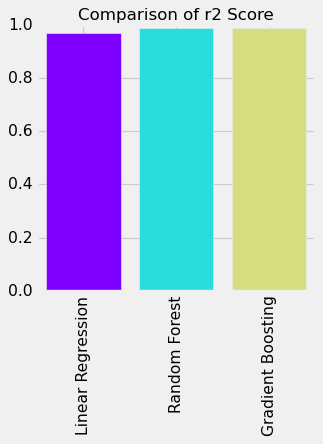

In [ ]:
r2_score = np.array([0.97, 0.99, 0.99])
labels = np.array(['Linear Regression', 'Random Forest' 'Gradient Boosting'])
index = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 4))

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (4, 4)

plt.bar(range(len(index)), r2_score[index], color = color)
plt.xticks(range(0, 3), ['Linear Regression', 'Random Forest','Gradient Boosting'], rotation = 90)
plt.title('Comparison of r2 Score', fontsize = 15)
plt.show()